# COVID19 India Data
Source: [MoHW, GoI](https://www.mohfw.gov.in/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Get the data from MoHW, GoI as html table
# First table is the dataframe
df = pd.read_html('https://www.mohfw.gov.in/')
country = df[0]

# Drop S.No. column
country.drop(['S. No.'], inplace=True, axis=1)

# Remove last two rows
country = country.iloc[:-2]

In [3]:
country.columns = ['State/UT', 'Confirmed', 'Recovered','Deceased']
country.head()

,State/UT,Confirmed,Recovered,Deceased
0,Andhra Pradesh,305,5,4
1,Andaman and Nicobar Islands,10,0,0
2,Arunachal Pradesh,1,0,0
3,Assam,27,0,0
4,Bihar,38,0,1


In [4]:
# Convert objects to respective type
# First the objects have to be converted from string to float to int
for col in country.columns:
    print(col)
    if col == 'State/UT':
        country[col] = country[col].astype(str)
    else:
        country[col] = country[col].astype(str).astype(float).astype(int)

State/UT
Confirmed
Recovered
Deceased


C:\Users\sanjiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanjiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
confirmed_cases = country['Confirmed'].sum()
recovered_cases = country['Recovered'].sum()
deceased_cases = country['Deceased'].sum()

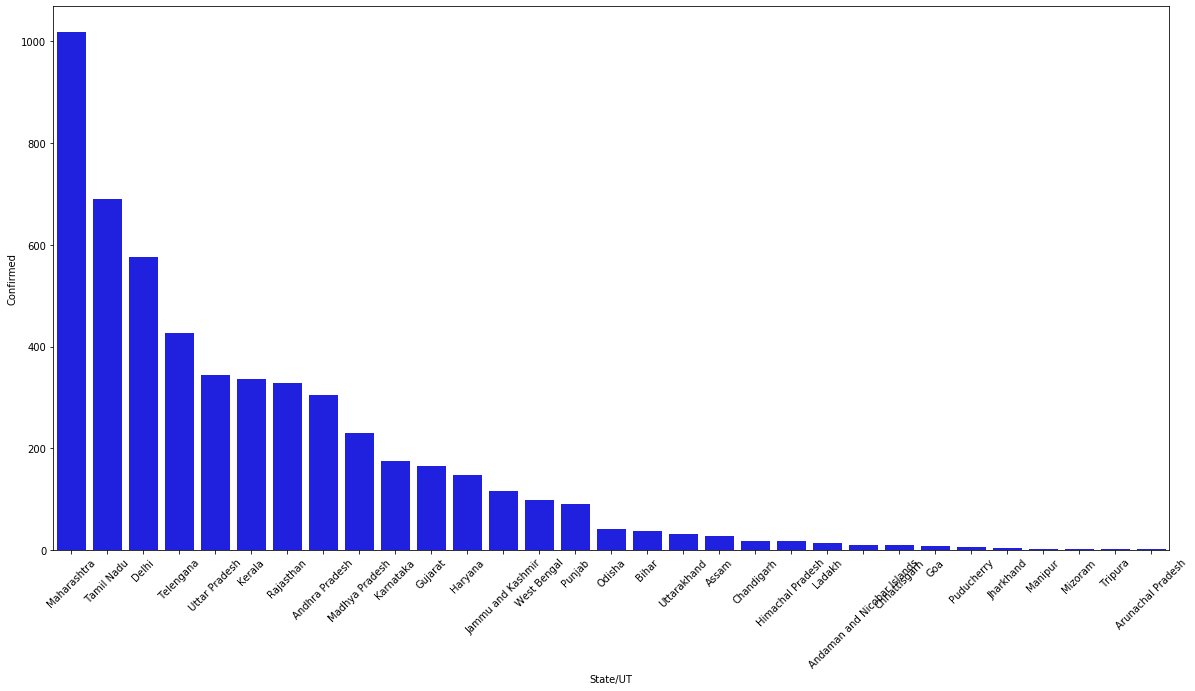

In [6]:
# State-wise Confirmed status
country = country.sort_values(by='Confirmed', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='State/UT', y='Confirmed', data=country, color="blue")
plt.xticks(rotation=45);

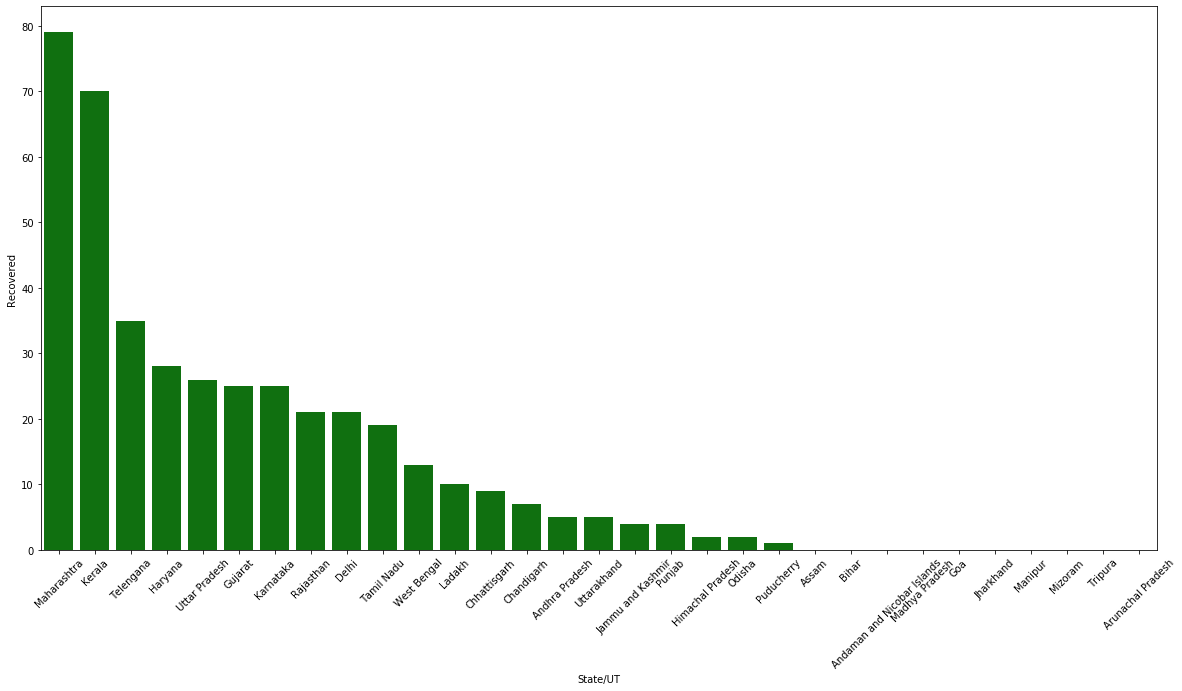

In [7]:
# State-wise Recovered status
country = country.sort_values(by='Recovered', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='State/UT', y='Recovered', data=country, color="green")
plt.xticks(rotation=45);

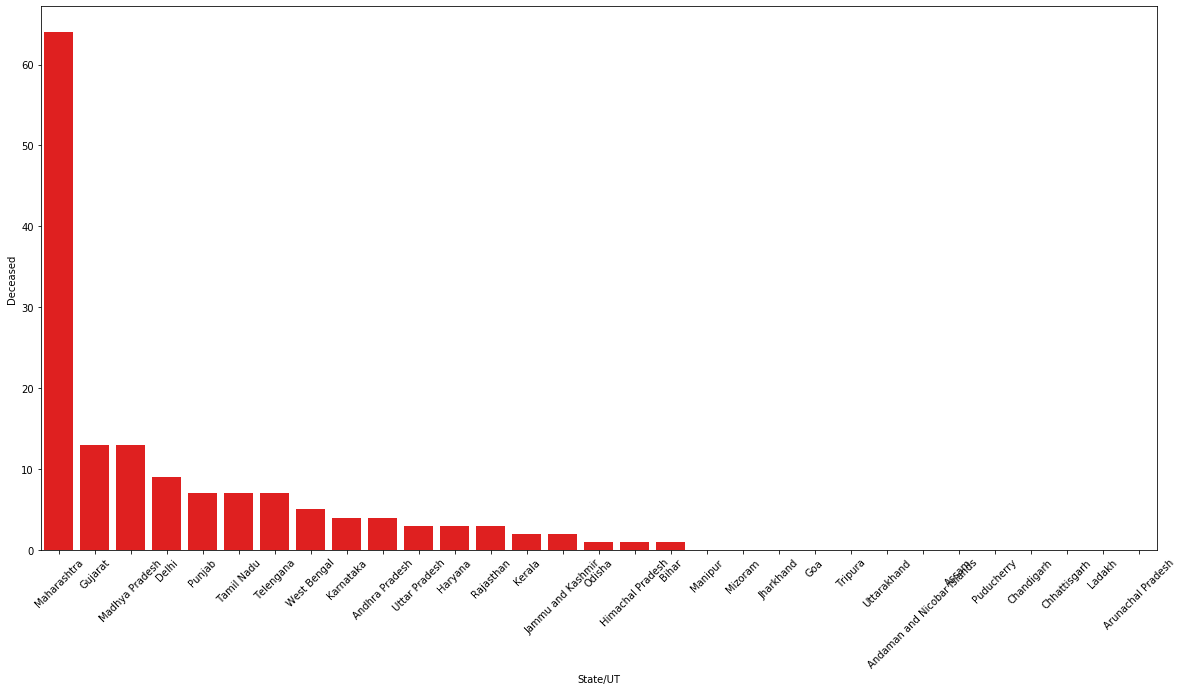

In [8]:
# State-wise Deceased status
country = country.sort_values(by='Deceased', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='State/UT', y='Deceased', data=country, color="red")
plt.xticks(rotation=45);

<Figure size 1440x720 with 0 Axes>

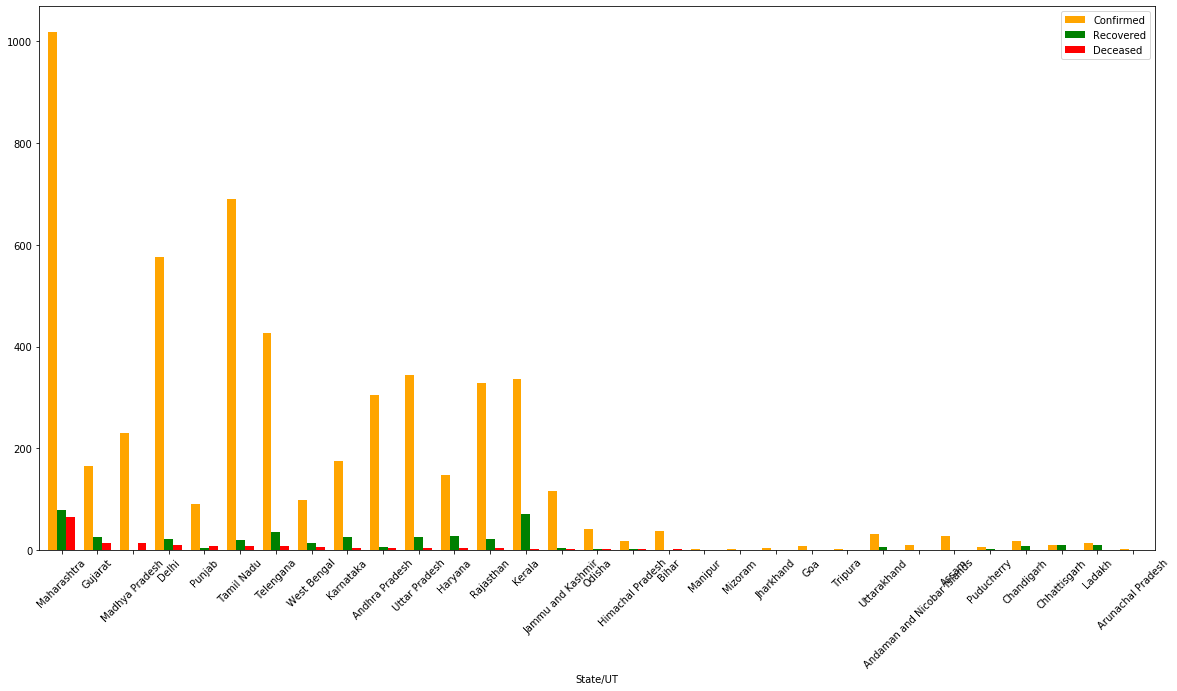

In [9]:
# Group barplot
country.index = country['State/UT']
plt.figure(figsize=(20,10));
country.plot(kind='bar', stacked=False, figsize=(20,10), width=0.75, color = ['orange','green','red'])
plt.xticks(rotation = 45);
